In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

In [2]:
def read_label():
    label = {}
    for i in range(1, 7):
        hi = 'house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(hi) as f:
            for line in f:
                splitted_line = line.split(' ')
               
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label
labels = read_label()
for i in range(1,3):
    print('House {}: '.format(i), labels[i], '\n')

House 1:  {1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'} 

House 2:  {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'lighting_4', 5: 'stove_5', 6: 'microwave_6', 7: 'washer_dryer_7', 8: 'kitchen_outlets_8', 9: 'refrigerator_9', 10: 'dishwaser_10', 11: 'disposal_11'} 



In [3]:
def read_merge_data(house):
    path = 'house_{}/'.format(house)
    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][1]], 
                                       dtype = {'unix_time': 'int64', labels[house][1]:'float64'}) 
    
    num_apps = len(glob.glob(path + 'channel*'))
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][i]], 
                                       dtype = {'unix_time': 'int64', labels[house][i]:'float64'})
        df = pd.merge(df, data, how = 'inner', on = 'unix_time')
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time','timestamp'], axis=1, inplace=True)
    #df.drop(['unix_time'], axis=1, inplace=True)
    
    return df

df = read_merge_data(1)

In [4]:
df.head()

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0


In [5]:
df.columns

Index(['mains_1', 'mains_2', 'oven_3', 'oven_4', 'refrigerator_5',
       'dishwaser_6', 'kitchen_outlets_7', 'kitchen_outlets_8', 'lighting_9',
       'washer_dryer_10', 'microwave_11', 'bathroom_gfi_12',
       'electric_heat_13', 'stove_14', 'kitchen_outlets_15',
       'kitchen_outlets_16', 'lighting_17', 'lighting_18', 'washer_dryer_19',
       'washer_dryer_20'],
      dtype='object')

In [6]:
import pandas as pd
#df.set_index('date').groupby('name')["ext price"].resample("M").sum()
#df.set_index('date').resample('M')["ext price"].sum()

result = df.resample('3s')["mains_1","mains_2","refrigerator_5"].sum()
print(result)

                     mains_1  mains_2  refrigerator_5
2011-04-18 13:22:12   222.20   118.83             6.0
2011-04-18 13:22:15   223.17   119.19             6.0
2011-04-18 13:22:18   223.60   118.92             6.0
2011-04-18 13:22:21   222.91   119.16             6.0
2011-04-18 13:22:24   222.94   118.83             6.0
2011-04-18 13:22:27     0.00     0.00             0.0
2011-04-18 13:22:30   222.90   118.76             6.0
2011-04-18 13:22:33   222.96   118.88             6.0
2011-04-18 13:22:36   222.54   118.36             6.0
2011-04-18 13:22:39   226.03   119.17             6.0
2011-04-18 13:22:42   222.96   119.03             6.0
2011-04-18 13:22:45   223.52   118.82             6.0
2011-04-18 13:22:48     0.00     0.00             0.0
2011-04-18 13:22:51   227.29   119.17             6.0
2011-04-18 13:22:54   221.72   118.61             6.0
2011-04-18 13:22:57   226.48   119.13             6.0
2011-04-18 13:23:00   226.38   118.91             6.0
2011-04-18 13:23:03   226.51

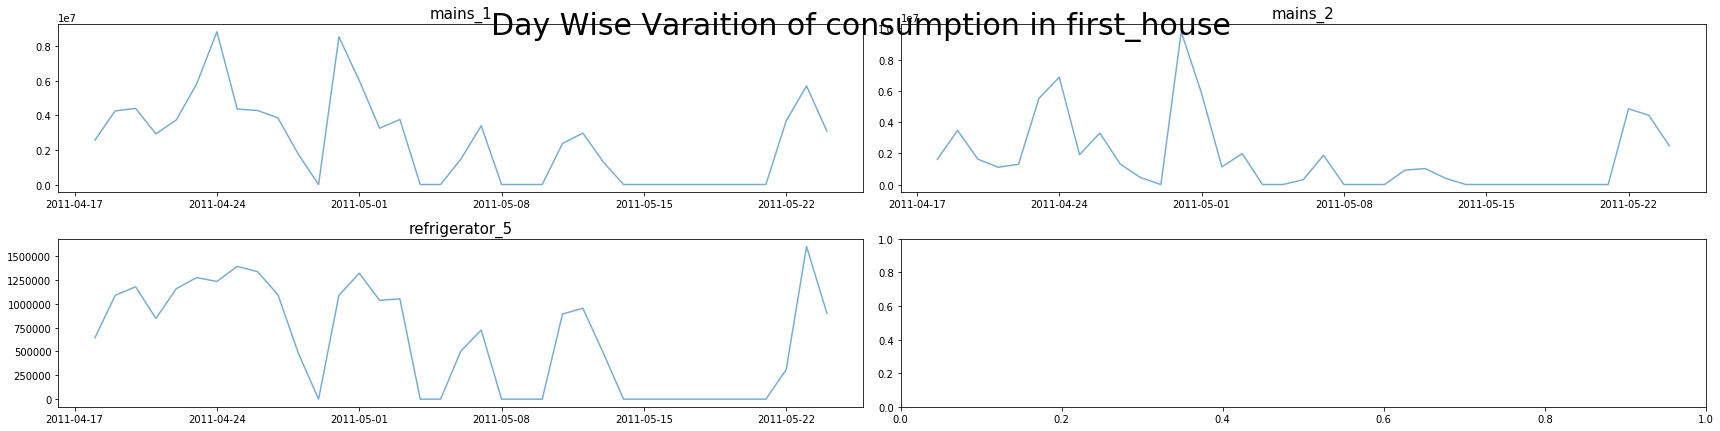

In [9]:
def plot_df(df, title):
    apps = df.columns.values
    num_apps = len(apps) 
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

plot_df(result,'Day Wise Varaition of consumption in first_house')

In [7]:
result.head()

result['mains_diff']=result['mains_1']-result['mains_2']



In [9]:
result['avg_mains']=(result['mains_1']+result['mains_2'])//2




In [10]:
result.head()

#result.shape

,mains_1,mains_2,refrigerator_5,mains_diff,avg_mains
2011-04-18 13:22:12,222.20,118.83,6.0,103.37,170.0
2011-04-18 13:22:15,223.17,119.19,6.0,103.98,171.0
2011-04-18 13:22:18,223.60,118.92,6.0,104.68,171.0
2011-04-18 13:22:21,222.91,119.16,6.0,103.75,171.0
2011-04-18 13:22:24,222.94,118.83,6.0,104.11,170.0


## Now we will try to predict refrigerator_5 consumption based on the mains reading

In [11]:
X=result[['mains_1','mains_2','mains_diff','avg_mains']]

Y= result['refrigerator_5']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range=(0, 1))
X_st=scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_st, Y, test_size=0.33, random_state=42)

## Model:1 Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


In [30]:
y_pred=reg.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)

rmse=np.sqrt(mse)

print(rmse)

53.973326829208844


In [17]:
print(X_train.shape[1])

4


## Model:2 Deep Learning

In [18]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.regularizers import l2
n_cols=X_train.shape[1]

def build_fc_model(layers):
    fc_model = Sequential()
    for i in range(len(layers)-1):
        fc_model.add( Dense(input_dim=n_cols, output_dim= layers[i+1]))
        fc_model.add( Dropout(0.5) )
        if i < (len(layers) - 2):
            fc_model.add( Activation('relu') )
    fc_model.summary()
    return fc_model
fc_model_1 = build_fc_model([2, 256, 512, 1024, 1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
__________

In [23]:
adam = Adam(lr = 1e-5)
fc_model_1.compile(loss='mean_squared_error', optimizer=adam)
start = time.time()
checkpointer = ModelCheckpoint(filepath="fc_refrig_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_1 = fc_model_1.fit( X_train, y_train,
                    batch_size=512, verbose=1, nb_epoch=100,
                    validation_data=(X_test,y_test), callbacks=[checkpointer])
print('Finish trainning. Time: ', time.time() - start)

Train on 699940 samples, validate on 344748 samples
Epoch 1/100
699940/699940 [==============================] - 76s 108us/step - loss: 4071.5442 - val_loss: 3893.2855
Epoch 2/100
699940/699940 [==============================] - 81s 116us/step - loss: 3949.2390 - val_loss: 3801.3066
Epoch 3/100
699940/699940 [==============================] - 85s 122us/step - loss: 3869.5928 - val_loss: 3678.3173
Epoch 4/100
699940/699940 [==============================] - 81s 116us/step - loss: 3785.8866 - val_loss: 3566.9659
Epoch 5/100
699940/699940 [==============================] - 82s 118us/step - loss: 3724.2867 - val_loss: 3473.0119
Epoch 6/100
699940/699940 [==============================] - 85s 121us/step - loss: 3652.6071 - val_loss: 3368.6154
Epoch 7/100
699940/699940 [==============================] - 81s 116us/step - loss: 3569.6364 - val_loss: 3247.8291
Epoch 8/100
699940/699940 [==============================] - 82s 117us/step - loss: 3477.2529 - val_loss: 3096.3723
Epoch 9/100
699940/6

699940/699940 [==============================] - 118s 169us/step - loss: 2416.7627 - val_loss: 1568.2240
Epoch 71/100
699940/699940 [==============================] - 117s 167us/step - loss: 2429.4972 - val_loss: 1579.0445
Epoch 72/100
699940/699940 [==============================] - 115s 164us/step - loss: 2412.6741 - val_loss: 1576.0793
Epoch 73/100
699940/699940 [==============================] - 114s 163us/step - loss: 2430.9881 - val_loss: 1581.5877
Epoch 74/100
699940/699940 [==============================] - 113s 161us/step - loss: 2417.9264 - val_loss: 1569.6827
Epoch 75/100
699940/699940 [==============================] - 117s 168us/step - loss: 2425.6259 - val_loss: 1576.9162
Epoch 76/100
699940/699940 [==============================] - 116s 166us/step - loss: 2425.7218 - val_loss: 1577.7242
Epoch 77/100
699940/699940 [==============================] - 112s 161us/step - loss: 2424.4124 - val_loss: 1576.6372
Epoch 78/100
699940/699940 [==============================] - 109s 15

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plot_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


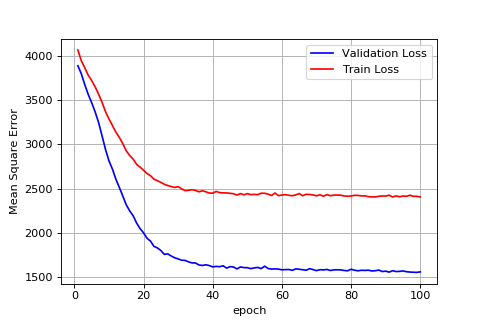

In [27]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Mean Square Error')

# list of epoch numbers
x = list(range(1,101))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = hist_fc_1.history['val_loss']
ty =hist_fc_1.history['loss']
plot_dynamic(x, vy, ty, ax)